In [1]:
# Import pandas dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import seaborn as sns
import scipy as sp

In [2]:
# Load cleaned byarea_df
c_byarea_df = pd.read_csv('Resources/cleaned_byarea_df.csv', ',')
c_byarea_df.head()

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.7,374.7,367.2,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.3,413.8,405.5
1,Alabama,160.6,170.5,165.5,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.1,377.1,369.5,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.2,419.8,411.4
3,Alabama,160.8,170.6,165.7,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7


In [3]:
# check c_byarea_df columns
c_byarea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949308 entries, 0 to 949307
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AREA                   949308 non-null  object 
 1   AGE_ADJUSTED_CI_LOWER  949308 non-null  float64
 2   AGE_ADJUSTED_CI_UPPER  949308 non-null  float64
 3   AGE_ADJUSTED_RATE      949308 non-null  float64
 4   EVENT_TYPE             949308 non-null  object 
 5   POPULATION             949308 non-null  int64  
 6   RACE                   949308 non-null  object 
 7   SEX                    949308 non-null  object 
 8   SITE                   949308 non-null  object 
 9   YEAR                   949308 non-null  int64  
 10  CRUDE_CI_LOWER         949308 non-null  float64
 11  CRUDE_CI_UPPER         949308 non-null  float64
 12  CRUDE_RATE             949308 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 94.2+ MB


In [4]:
# load smoking_rate.csv file
smoking_df = pd.read_csv('Resources/smoking_rate.csv')
smoking_df.head(3)

,State,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1


In [5]:
# load obesity_rate.csv file
obesity_df = pd.read_csv('Resources/obesity_rate.csv')
obesity_df.head(3)

,State,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Alabama,33.0,32.0,33.0,32.4,33.5,35.6,35.7,36.3,36.2,36.1
1,Alaska,25.2,27.4,25.7,28.4,29.7,29.8,31.4,34.2,29.5,30.5
2,Arizona,25.2,25.1,26.0,26.8,28.9,28.4,29.0,29.5,30.0,31.4


In [6]:
# load per_capita_income file
income_df = pd.read_csv('Resources/cleaned_per_capita_income.csv')
income_df.head(3)

,GeoName,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,28693,30672,31617,31839,32717,34280,35868,38120,39883,...,40683,42747,44548,44798,46887,48725,49613,51550,53786,56250
1,Alabama,23333,24306,25057,25648,26673,28434,29949,31474,32739,...,33946,35010,35824,36014,37055,38531,39014,40223,41539,43288
2,Alaska,29951,32044,33626,34756,35996,37016,39075,41157,43906,...,49652,52569,53708,52812,55867,57575,56278,57189,59618,61316


## prepare smoking data

In [7]:
# reshape smoking_df to long form to merge with cancer data
# how to: https://towardsdatascience.com/how-to-reshape-a-pandas-dataframe-98b42c428a8

# first need to rename each column in order to use the wide_to_long()
smoking_df.rename(columns={'2011':'smoking_2011',
                           '2012':'smoking_2012',
                           '2013':'smoking_2013',
                           '2014':'smoking_2014',
                           '2015':'smoking_2015',
                           '2016':'smoking_2016',
                           '2017':'smoking_2017',
                           '2018':'smoking_2018',
                           '2019':'smoking_2019',
                           '2020':'smoking_2020'}, inplace=True)

In [8]:
smoking_df.head()

,State,smoking_2011,smoking_2012,smoking_2013,smoking_2014,smoking_2015,smoking_2016,smoking_2017,smoking_2018,smoking_2019,smoking_2020
0,Alabama,24.3,23.8,21.5,21.1,21.4,21.5,20.9,19.2,20.2,17.2
1,Alaska,22.9,20.5,22.6,19.9,19.1,19.0,21.0,19.1,17.4,17.1
2,Arizona,19.3,17.1,16.3,16.5,14.0,14.7,15.6,14.0,14.9,13.1
3,Arkansas,27.0,25.0,25.9,24.7,24.9,23.6,22.3,22.7,20.2,21.1
4,California,13.7,12.6,12.5,12.9,11.7,11.0,11.3,11.2,10.0,8.8


In [9]:
# convert smoking_df to long format
smoking_long_df = pd.wide_to_long(smoking_df, 
                              stubnames=['smoking'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
smoking_long_df

,,smoking
State,YEAR,
Alabama,2011,24.3
Alaska,2011,22.9
Arizona,2011,19.3
Arkansas,2011,27.0
California,2011,13.7
...,...,...
West Virginia,2020,22.0
Wisconsin,2020,13.3
Wyoming,2020,16.4


In [10]:
# Adding back index for ease of merging later
smoking_long_df = smoking_long_df.reset_index()
smoking_long_df

,State,YEAR,smoking
0,Alabama,2011,24.3
1,Alaska,2011,22.9
2,Arizona,2011,19.3
3,Arkansas,2011,27.0
4,California,2011,13.7
...,...,...,...
525,West Virginia,2020,22.0
526,Wisconsin,2020,13.3
527,Wyoming,2020,16.4
528,Guam,2020,20.0


## prepare obesity data

In [11]:
# reshape obesity_df to long form to merge with cancer data
obesity_df.rename(columns={'2010':'obesity_2010',
                           '2011':'obesity_2011',
                           '2012':'obesity_2012',
                           '2013':'obesity_2013',
                           '2014':'obesity_2014',
                           '2015':'obesity_2015',
                           '2016':'obesity_2016',
                           '2017':'obesity_2017',
                           '2018':'obesity_2018',
                           '2019':'obesity_2019'}, inplace=True)

In [12]:
# convert obesity_df to long format
obesity_long_df = pd.wide_to_long(obesity_df, 
                              stubnames=['obesity'],
                              i='State',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
obesity_long_df

,,obesity
State,YEAR,
Alabama,2010,33.0
Alaska,2010,25.2
Arizona,2010,25.2
Arkansas,2010,30.9
California,2010,24.7
...,...,...
West Virginia,2019,39.7
Wisconsin,2019,34.2
Wyoming,2019,29.7


## prepare INCOME data

In [13]:
# first need to rename each column in order to use the wide_to_long()
income_df.rename(columns={'1999':'INCOME_1999',
                       '2000':'INCOME_2000',
                       '2001':'INCOME_2001',
                       '2002':'INCOME_2002',
                       '2003':'INCOME_2003',
                       '2004':'INCOME_2004',
                       '2005':'INCOME_2005',
                       '2006':'INCOME_2006',
                       '2007':'INCOME_2007',
                       '2008':'INCOME_2008',
                       '2009':'INCOME_2009',
                       '2010':'INCOME_2010',
                       '2011':'INCOME_2011',
                       '2012':'INCOME_2012',
                       '2013':'INCOME_2013',
                       '2014':'INCOME_2014',
                       '2015':'INCOME_2015',
                       '2016':'INCOME_2016',
                       '2017':'INCOME_2017',
                       '2018':'INCOME_2018',
                       '2019':'INCOME_2019',}, inplace=True)

In [14]:
# convert income_df to long format
income_long_df = pd.wide_to_long(income_df, 
                              stubnames=['INCOME'],
                              i='GeoName',
                              j='YEAR',
                              sep="_",
                              suffix='\w+')
income_long_df

,,INCOME
GeoName,YEAR,
United States,1999,28693
Alabama,1999,23333
Alaska,1999,29951
Arizona,1999,24960
Arkansas,1999,21871
...,...,...
Virginia,2019,59073
Washington,2019,64189
West Virginia,2019,42951


## prepare cancer data

In [15]:
# filter for rows for state lung cancer mortality rate by all sex and race 
cancer_df = c_byarea_df.loc[(c_byarea_df['EVENT_TYPE']=='Mortality') &
                              (c_byarea_df['SEX']!='Male and Female') &
                              (c_byarea_df['RACE']=='All Races') &
                              (c_byarea_df['SITE']=='Lung and Bronchus') &
                              (c_byarea_df['YEAR']!= 20152019)
                              ]
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 573 to 931949
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AREA                   2142 non-null   object 
 1   AGE_ADJUSTED_CI_LOWER  2142 non-null   float64
 2   AGE_ADJUSTED_CI_UPPER  2142 non-null   float64
 3   AGE_ADJUSTED_RATE      2142 non-null   float64
 4   EVENT_TYPE             2142 non-null   object 
 5   POPULATION             2142 non-null   int64  
 6   RACE                   2142 non-null   object 
 7   SEX                    2142 non-null   object 
 8   SITE                   2142 non-null   object 
 9   YEAR                   2142 non-null   int64  
 10  CRUDE_CI_LOWER         2142 non-null   float64
 11  CRUDE_CI_UPPER         2142 non-null   float64
 12  CRUDE_RATE             2142 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 234.3+ KB


In [16]:
cancer_df.head(30)

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
573,Alabama,35.5,40.3,37.8,Mortality,2293259,All Races,Female,Lung and Bronchus,1999,40.7,46.1,43.3
575,Alabama,36.8,41.6,39.1,Mortality,2302835,All Races,Female,Lung and Bronchus,2000,42.5,48.0,45.2
577,Alabama,37.3,42.1,39.7,Mortality,2309496,All Races,Female,Lung and Bronchus,2001,43.2,48.7,45.9
579,Alabama,38.7,43.6,41.1,Mortality,2314370,All Races,Female,Lung and Bronchus,2002,44.8,50.5,47.6
581,Alabama,39.9,44.9,42.3,Mortality,2324069,All Races,Female,Lung and Bronchus,2003,47.0,52.7,49.8
583,Alabama,40.0,45.0,42.4,Mortality,2337857,All Races,Female,Lung and Bronchus,2004,47.1,52.9,49.9
585,Alabama,40.8,45.8,43.2,Mortality,2354514,All Races,Female,Lung and Bronchus,2005,48.3,54.2,51.2
587,Alabama,37.7,42.4,40.0,Mortality,2385480,All Races,Female,Lung and Bronchus,2006,44.9,50.4,47.6
589,Alabama,38.7,43.4,41.0,Mortality,2407275,All Races,Female,Lung and Bronchus,2007,46.3,52.0,49.1
591,Alabama,36.9,41.5,39.1,Mortality,2430257,All Races,Female,Lung and Bronchus,2008,44.7,50.3,47.4


In [17]:
# cancer_df['AGE_ADJUSTED_RATE'].unique()

In [18]:
# cancer_df['AGE_ADJUSTED_CI_UPPER'].unique()

In [19]:
# Pick out just the columns needed for our linear regression analysis
# CRUDE_RATE as the independent variable
cancer_mr_df = cancer_df[['AREA', 'YEAR', 'SEX', 'AGE_ADJUSTED_RATE']]
cancer_mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 573 to 931949
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               2142 non-null   object 
 1   YEAR               2142 non-null   int64  
 2   SEX                2142 non-null   object 
 3   AGE_ADJUSTED_RATE  2142 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 83.7+ KB


In [20]:
cancer_mr_df.head(30)

,AREA,YEAR,SEX,AGE_ADJUSTED_RATE
573,Alabama,1999,Female,37.8
575,Alabama,2000,Female,39.1
577,Alabama,2001,Female,39.7
579,Alabama,2002,Female,41.1
581,Alabama,2003,Female,42.3
583,Alabama,2004,Female,42.4
585,Alabama,2005,Female,43.2
587,Alabama,2006,Female,40.0
589,Alabama,2007,Female,41.0
591,Alabama,2008,Female,39.1


In [21]:
cancer_mr_df = cancer_mr_df.reset_index(drop=True)
cancer_mr_df

,AREA,YEAR,SEX,AGE_ADJUSTED_RATE
0,Alabama,1999,Female,37.8
1,Alabama,2000,Female,39.1
2,Alabama,2001,Female,39.7
3,Alabama,2002,Female,41.1
4,Alabama,2003,Female,42.3
...,...,...,...,...
2137,Wyoming,2015,Male,35.1
2138,Wyoming,2016,Male,35.9
2139,Wyoming,2017,Male,35.4
2140,Wyoming,2018,Male,28.3


## prepare Multiple Regression data

In [22]:
# merge the cancer df and smoking df
mr_df = pd.merge(cancer_mr_df, smoking_long_df, how='left', left_on=['AREA', 'YEAR'], right_on=['State', 'YEAR'])
mr_df.head(30)

,AREA,YEAR,SEX,AGE_ADJUSTED_RATE,State,smoking
0,Alabama,1999,Female,37.8,NaN,NaN
1,Alabama,2000,Female,39.1,NaN,NaN
2,Alabama,2001,Female,39.7,NaN,NaN
3,Alabama,2002,Female,41.1,NaN,NaN
4,Alabama,2003,Female,42.3,NaN,NaN
5,Alabama,2004,Female,42.4,NaN,NaN
6,Alabama,2005,Female,43.2,NaN,NaN
7,Alabama,2006,Female,40.0,NaN,NaN
8,Alabama,2007,Female,41.0,NaN,NaN
9,Alabama,2008,Female,39.1,NaN,NaN


In [23]:
# check to see what rows are missing data
mr_df[mr_df.isna().any(axis=1)]

,AREA,YEAR,SEX,AGE_ADJUSTED_RATE,State,smoking
0,Alabama,1999,Female,37.8,NaN,NaN
1,Alabama,2000,Female,39.1,NaN,NaN
2,Alabama,2001,Female,39.7,NaN,NaN
3,Alabama,2002,Female,41.1,NaN,NaN
4,Alabama,2003,Female,42.3,NaN,NaN
...,...,...,...,...,...,...
2128,Wyoming,2006,Male,54.4,NaN,NaN
2129,Wyoming,2007,Male,51.5,NaN,NaN
2130,Wyoming,2008,Male,47.4,NaN,NaN
2131,Wyoming,2009,Male,51.2,NaN,NaN


In [24]:
mr_df = mr_df.dropna()
mr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 12 to 2141
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA               916 non-null    object 
 1   YEAR               916 non-null    int64  
 2   SEX                916 non-null    object 
 3   AGE_ADJUSTED_RATE  916 non-null    float64
 4   State              916 non-null    object 
 5   smoking            916 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 50.1+ KB


In [25]:
mr_df.drop(columns = ['AREA','YEAR'], inplace=True)
mr_df

,SEX,AGE_ADJUSTED_RATE,State,smoking
12,Female,39.8,Alabama,24.3
13,Female,38.3,Alabama,23.8
14,Female,39.9,Alabama,21.5
15,Female,38.7,Alabama,21.1
16,Female,34.6,Alabama,21.4
...,...,...,...,...
2137,Male,35.1,Wyoming,19.1
2138,Male,35.9,Wyoming,19.0
2139,Male,35.4,Wyoming,18.7
2140,Male,28.3,Wyoming,18.8


In [26]:
corr = mr_df.corr()
corr.head(40)

,AGE_ADJUSTED_RATE,smoking
AGE_ADJUSTED_RATE,1.000000,0.626242
smoking,0.626242,1.000000


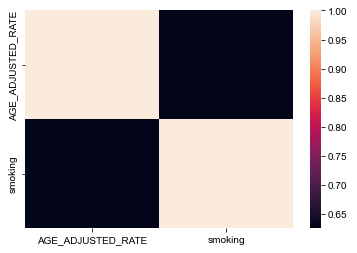

In [27]:
sns.heatmap(corr)

sns.set(rc={'figure.figsize':(5,5)})

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


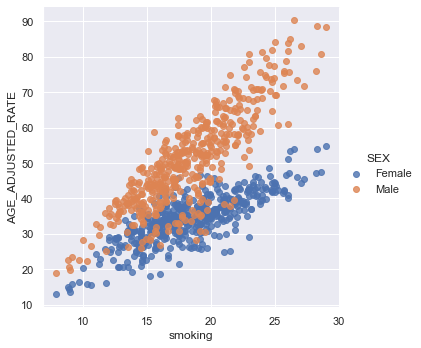

In [32]:
sns.lmplot('smoking', 'AGE_ADJUSTED_RATE', data=mr_df, hue='SEX', fit_reg=False)
plt.show()

C:\Users\yingk\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


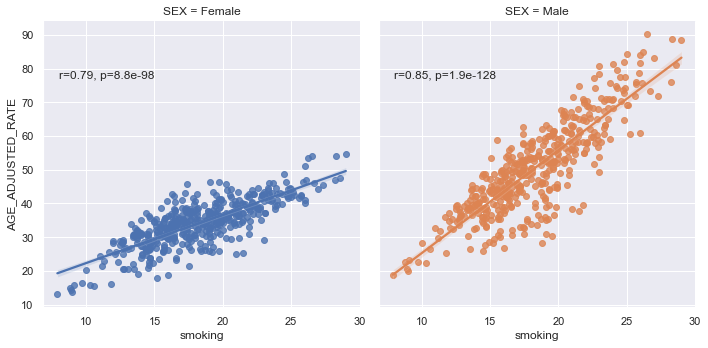

In [31]:
g = sns.lmplot('smoking','AGE_ADJUSTED_RATE', data=mr_df, hue='SEX', col='SEX', fit_reg=True)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['smoking'],data['AGE_ADJUSTED_RATE'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r,p), transform=ax.transAxes)

g.map_dataframe(annotate)
plt.show()